# Given two random variables A and B

# If Pr(A) = Pr(A|B) then A and B are independant

In [1]:
import numpy as np
import pandas as pd

In [2]:
#df = pd.read_csv('../data_processing/updates/AMD_train_updated_sep3.csv', index_col=0)


In [15]:
df_AAPL = pd.read_csv('./df_AAPL_subset.csv', index_col=0) #df['close_AAPL']

In [16]:
df_AAPL.index = pd.to_datetime(df_AAPL.index)
df_AAPL = df_AAPL.sort_index()

In [17]:
print(df_AAPL.shape)

(685083, 1)


In [18]:
print(df_AAPL)

                           close_AAPL
time                                 
2022-02-24 13:22:30-05:00      158.43
2022-02-24 13:22:35-05:00      158.48
2022-02-24 13:22:40-05:00      158.47
2022-02-24 13:22:45-05:00      158.44
2022-02-24 13:22:50-05:00      158.50
...                               ...
2022-09-26 15:59:35-04:00      150.71
2022-09-26 15:59:40-04:00      150.67
2022-09-26 15:59:45-04:00      150.61
2022-09-26 15:59:50-04:00      150.67
2022-09-26 15:59:55-04:00      150.75

[685083 rows x 1 columns]


In [19]:
#df_AAPL.iloc[int(df_AAPL.shape[0]*0.2):].to_csv('./df_AAPL_subset.csv')

In [20]:
#df_AAPL.to_csv('./df_AAPL.csv')

# Does the price movement in t+1 depend on the price movement at time t ?

If they are independant, then:


Pr(stock price goes up at t + 1 | stock price goes up at time t ) = Pr(stock price goes up at t + 1)


Pr(stock price goes up at t + 1 | stock price goes down at time t ) = Pr(stock price goes up at t + 1)


ect


In [21]:
loc_stock_goes_up_at_t = np.where(df_AAPL.diff() > 0)[0]
loc_stock_goes_up_at_t1 = np.where(df_AAPL.diff().iloc[1:] > 0)[0]

pr_t1_up_conditioned_on_t_up = np.intersect1d(loc_stock_goes_up_at_t1, 
                                              loc_stock_goes_up_at_t).shape[0] / loc_stock_goes_up_at_t1.shape[0]
pr_t1_up = loc_stock_goes_up_at_t1.shape[0] / df_AAPL.shape[0]

In [22]:
print(pr_t1_up_conditioned_on_t_up)
print(pr_t1_up)

0.4159922895547562
0.4240581068279318


In [23]:
loc_stock_goes_down_at_t = np.where(df_AAPL.diff() < 0)[0]
loc_stock_goes_up_at_t1 = np.where(df_AAPL.diff().iloc[1:] > 0)[0]

pr_t1_up_conditioned_on_t_down = np.intersect1d(loc_stock_goes_up_at_t1, 
                                              loc_stock_goes_down_at_t).shape[0] / loc_stock_goes_up_at_t1.shape[0]
pr_t1_up = loc_stock_goes_up_at_t1.shape[0] / df_AAPL.shape[0]

In [24]:
print(pr_t1_up_conditioned_on_t_down)
print(pr_t1_up)

0.43595339311223175
0.4240581068279318


In [25]:
loc_stock_goes_down_at_t = np.where(df_AAPL.diff() < 0)[0]
loc_stock_goes_down_at_t1 = np.where(df_AAPL.diff().iloc[1:] < 0)[0]

pr_t1_down_conditioned_on_t_down = np.intersect1d(loc_stock_goes_down_at_t1, 
                                              loc_stock_goes_down_at_t).shape[0] / loc_stock_goes_down_at_t1.shape[0]
pr_t1_down = loc_stock_goes_down_at_t1.shape[0] / df_AAPL.shape[0]

In [26]:
print(pr_t1_down_conditioned_on_t_down)
print(pr_t1_down)

0.4152322345335431
0.42221891362068537


In [27]:
pr_t1_down_conditioned_on_t_up = np.intersect1d(loc_stock_goes_down_at_t1, 
                                              loc_stock_goes_up_at_t).shape[0] / loc_stock_goes_down_at_t1.shape[0]

In [28]:
print(pr_t1_down_conditioned_on_t_up)
print(pr_t1_down)

0.4380010717187257
0.42221891362068537


Can we conclude that the price movement at t + 1 is independant of the price movement at t?

# Another analysis

# MA with a window size of N at time t = avg(Price[t, t-1, t-2, ..., t-N]), lagging
# centered MA (EMA) at time t = avg(Price[t-N/2, t-N/2 + 1, ..., t ..., t+N/2]), no lag

# EMA is an estimate of the expectation value of the price move at time t
# Can MA at time t give us info on EMA at time t + 1

In [29]:
from matplotlib import pyplot as plt

In [30]:
days = df_AAPL.index.map(pd.Timestamp.date).unique()

In [31]:
day = days[0]
current_day_df_idxes = np.where(df_AAPL.index.map(pd.Timestamp.date) == day)[0]
current_day_df = df_AAPL.iloc[current_day_df_idxes]
current_day_df_diff = current_day_df.diff()
current_day_df_diff_next_time_step = current_day_df_diff.iloc[1:]


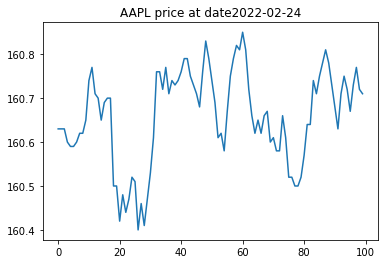

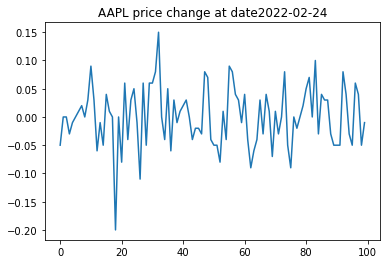

In [32]:
start_index = 1000
length = 100
plt.figure()
plt.plot(range(length), current_day_df.iloc[start_index:start_index+length])
plt.title('AAPL price at date' + str(day))
plt.show()

plt.figure()
plt.plot(range(length), current_day_df_diff.iloc[start_index:start_index+length])
plt.title('AAPL price change at date' + str(day))
plt.show()

There is a lot of noise in the price movements

Lets first try to reduce the noise by computing a moving average

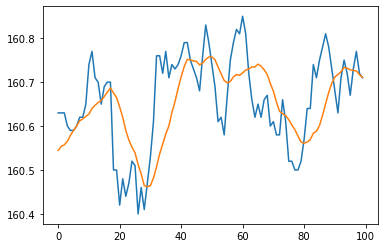

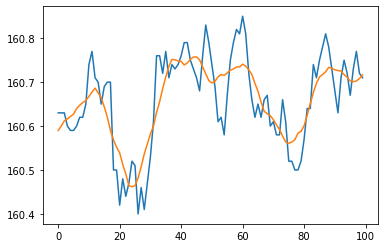

In [33]:
rolling_avg_current_df = current_day_df.rolling(11).mean()
plt.figure()
plt.plot(range(length), current_day_df.iloc[start_index:start_index+length])
plt.plot(range(length), rolling_avg_current_df.iloc[start_index:start_index+length])
plt.show()

rolling_avg_current_df_centered = current_day_df.rolling(11, center = True).mean()
plt.figure()
plt.plot(range(length), current_day_df.iloc[start_index:start_index+length])
plt.plot(range(length), rolling_avg_current_df_centered.iloc[start_index:start_index+length])
plt.show()

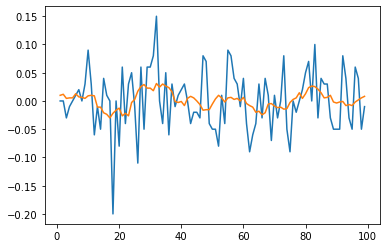

In [34]:
plt.figure()
plt.plot(range(length), current_day_df.iloc[start_index:start_index+length].diff())
plt.plot(range(length), rolling_avg_current_df_centered.iloc[start_index:start_index+length].diff())
plt.show()

1. Computing the moving average can reduce noise

2. The normal rolling average (which is lagging) can be computed in real time

3. The centered rolling average, but can't be computed in real time because it uses future data points. It estimate the expectation value of the current price

# Can the expectation value of the future price movement be predicted using current and past data ?

Can I use the (lagging) moving average price change at time step t to predict the non-lagging moving averge price change at time step t + 1

In [35]:
rolling_window_size = 9
pr_df = []
for day in days:
    print(day)
    current_day_df_idxes = np.where(df_AAPL.index.map(pd.Timestamp.date) == day)[0]
    current_day_df = df_AAPL.iloc[current_day_df_idxes]
    current_day_df_diff = current_day_df.diff()
    current_day_df_diff_next_time_step = current_day_df_diff.iloc[1:]
    
    normal_moving_avg = current_day_df_diff.rolling(rolling_window_size).mean()
    expectation_value_of_price_change_at_t1 = current_day_df_diff_next_time_step.rolling(rolling_window_size, 
                                                                                         center = True).mean()
    pos_MA_idx = np.where(normal_moving_avg > 0)[0]
    pos_EMA_t1_idx = np.where(expectation_value_of_price_change_at_t1 > 0)[0]
    pos_MA_and_pos_EMA = np.intersect1d(pos_MA_idx, pos_EMA_t1_idx)
    pr_pos_EMA_given_pos_MA = pos_MA_and_pos_EMA.shape[0]/pos_EMA_t1_idx.shape[0]
    pr_pos_EMA = pos_EMA_t1_idx.shape[0]/(expectation_value_of_price_change_at_t1.shape[0] - 
                                         np.where(np.isnan(expectation_value_of_price_change_at_t1))[0].shape[0])
    
    print(pr_pos_EMA_given_pos_MA)
    print(pr_pos_EMA)
    
    pr_df.append([day, pr_pos_EMA_given_pos_MA, pr_pos_EMA])
    
    

2022-02-24
0.676728334956183
0.5459861775651249
2022-02-25
0.6724576271186441
0.5052451295225862
2022-02-28
0.6424482606781153
0.4861913937058446
2022-03-01
0.5770136599152144
0.45470122081816233
2022-03-02
0.6264693077927732
0.49175765360736456
2022-03-03
0.6154575628259839
0.45286665235129914
2022-03-04
0.6350649350649351
0.4947526236881559
2022-03-07
0.5855169128156265
0.44936844358809674
2022-03-08
0.6325966850828729
0.46499678869621064
2022-03-09
0.6521739130434783
0.5120959109398415
2022-03-10
0.6111111111111112
0.4701348747591522
2022-03-11
0.6131898971000935
0.4577178334403768
2022-03-14
0.6
0.444515852613539
2022-03-15
0.6737792367665162
0.521729822307857
2022-03-16
0.6229361892012495
0.4797687861271676
2022-03-17
0.6236178681999115
0.4840505245129523
2022-03-18
0.6503996634413126
0.5088846071505031
2022-03-21
0.6651143099068586
0.5056733033611647
2022-03-22
0.63709336713139
0.5067437379576107
2022-03-23
0.6539777587681779
0.500535217298223
2022-03-24
0.6586700336700336
0.5086

In [36]:
pr_df = pd.DataFrame(pr_df)
pr_df.columns = ['date', 'pr_EMA_up_at_t1_given_MA_up_at_t', 'pr_EMA_up_at_t1']
pr_df = pr_df.set_index('date')
print(pr_df.mean())
print(pr_df)

pr_EMA_up_at_t1_given_MA_up_at_t    0.62333
pr_EMA_up_at_t1                     0.47576
dtype: float64
            pr_EMA_up_at_t1_given_MA_up_at_t  pr_EMA_up_at_t1
date                                                         
2022-02-24                          0.676728         0.545986
2022-02-25                          0.672458         0.505245
2022-02-28                          0.642448         0.486191
2022-03-01                          0.577014         0.454701
2022-03-02                          0.626469         0.491758
...                                      ...              ...
2022-09-20                          0.624460         0.495397
2022-09-21                          0.636042         0.484693
2022-09-22                          0.625563         0.475701
2022-09-23                          0.587182         0.454292
2022-09-26                          0.608696         0.467780

[147 rows x 2 columns]


In [37]:
print(pr_df.std())

pr_EMA_up_at_t1_given_MA_up_at_t    0.022381
pr_EMA_up_at_t1                     0.024433
dtype: float64


Text(0.5, 0, 'Counts')

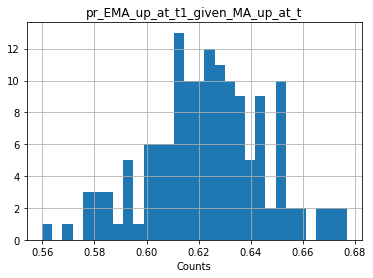

In [38]:
pr_df['pr_EMA_up_at_t1_given_MA_up_at_t'].hist(bins=30)
plt.title('pr_EMA_up_at_t1_given_MA_up_at_t')
plt.xlabel('Counts')



Text(0.5, 0, 'Counts')

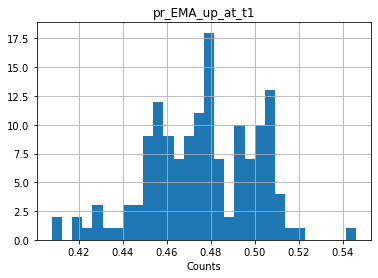

In [39]:
pr_df['pr_EMA_up_at_t1'].hist(bins=30)
plt.title('pr_EMA_up_at_t1')
plt.xlabel('Counts')